In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from pyECLAT import ECLAT
import time

In [7]:
data=pd.read_csv("basket_data.csv")

In [8]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
388018,581587,PACK OF 20 SPACEBOY NAPKINS,12.0,09.12.2011 12:50,"0,85",12680.0,France
388019,581587,CHILDREN'S APRON DOLLY GIRL,6.0,09.12.2011 12:50,"2,1",12680.0,France
388020,581587,CHILDRENS CUTLERY DOLLY GIRL,4.0,09.12.2011 12:50,"4,15",12680.0,France
388021,581587,CHILDRENS CUTLERY CIRCUS PARADE,4.0,09.12.2011 12:50,"4,15",12680.0,France


In [9]:
data.shape

(388023, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388023 entries, 0 to 388022
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      388023 non-null  int64  
 1   Itemname    388023 non-null  object 
 2   Quantity    386083 non-null  float64
 3   Date        388023 non-null  object 
 4   Price       387635 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     388023 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 20.7+ MB


In [11]:
data.isnull().sum()

BillNo           0
Itemname         0
Quantity      1940
Date             0
Price          388
CustomerID       0
Country          0
dtype: int64

In [12]:
#filling price and quantity with most repeated values
data['Price'].fillna(data['Price'].mode()[0], inplace=True)
data['Quantity'].fillna(data['Quantity'].mode()[0], inplace=True)


In [13]:
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [14]:
data['Price'] = data['Price'].str.replace(',', '.').astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388023 entries, 0 to 388022
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      388023 non-null  int64  
 1   Itemname    388023 non-null  object 
 2   Quantity    388023 non-null  float64
 3   Date        388023 non-null  object 
 4   Price       388023 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     388023 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 20.7+ MB


Numerical Variables

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BillNo,388023.0,560610.618886,13127.766961,536365.0,549225.00,561888.00,572131.00,581587.00
Quantity,388023.0,12.840837,182.596557,1.0,2.00,5.00,12.00,80995.00
Price,388023.0,3.077634,21.984452,0.0,1.25,1.93,3.75,8142.75
CustomerID,388023.0,15316.931710,1721.846964,12346.0,13950.00,15265.00,16837.00,18287.00


In [17]:
corr=data.corr()
corr.style.background_gradient(cmap="coolwarm")

C:\Users\A\AppData\Local\Temp\ipykernel_7844\3776570226.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,BillNo,Quantity,Price,CustomerID
BillNo,1.000000,-0.002486,-0.004803,-0.000335
Quantity,-0.002486,1.000000,-0.004368,-0.005976
Price,-0.004803,-0.004368,1.000000,-0.010244
CustomerID,-0.000335,-0.005976,-0.010244,1.000000


Text(0, 0.5, 'Price')

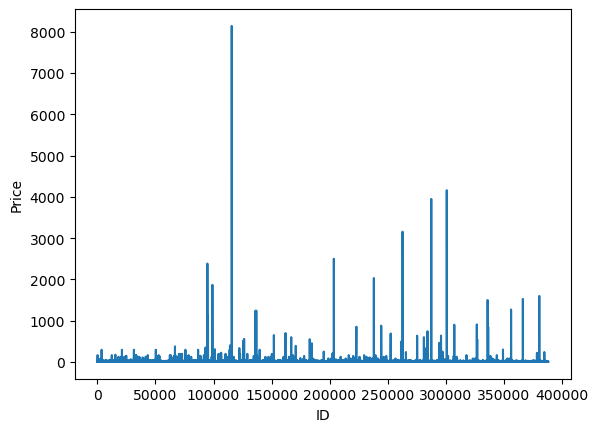

In [18]:
data["Price"].plot()
plt.xlabel('ID')
plt.ylabel('Price')

In [19]:
data["Price"].max()

8142.75

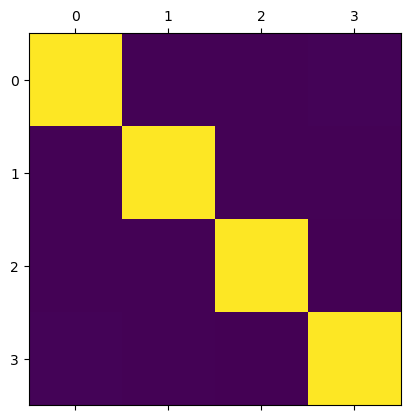

In [20]:
plt.matshow(corr)

# Categorical Variables

In [21]:
data["Itemname"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1976
REGENCY CAKESTAND 3 TIER              1643
JUMBO BAG RED RETROSPOT               1591
ASSORTED COLOUR BIRD ORNAMENT         1391
PARTY BUNTING                         1369
                                      ... 
OCEAN STRIPE HAMMOCK                     1
PAINTED HEART WREATH WITH BELL           1
WEEKEND BAG VINTAGE ROSE PAISLEY         1
WRAP  PINK FLOCK                         1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Itemname, Length: 3846, dtype: int64

In [22]:
data["Itemname"].value_counts(normalize=True)

WHITE HANGING HEART T-LIGHT HOLDER    0.005092
REGENCY CAKESTAND 3 TIER              0.004234
JUMBO BAG RED RETROSPOT               0.004100
ASSORTED COLOUR BIRD ORNAMENT         0.003585
PARTY BUNTING                         0.003528
                                        ...   
OCEAN STRIPE HAMMOCK                  0.000003
PAINTED HEART WREATH WITH BELL        0.000003
WEEKEND BAG VINTAGE ROSE PAISLEY      0.000003
WRAP  PINK FLOCK                      0.000003
PAPER CRAFT , LITTLE BIRDIE           0.000003
Name: Itemname, Length: 3846, dtype: float64

In [23]:
dataItems=data["Itemname"].value_counts().reset_index(name="Count")


In [24]:
dataItems.rename(columns={"index":"ItemName"},inplace=True)
dataItems

,ItemName,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,1976
1,REGENCY CAKESTAND 3 TIER,1643
2,JUMBO BAG RED RETROSPOT,1591
3,ASSORTED COLOUR BIRD ORNAMENT,1391
4,PARTY BUNTING,1369
...,...,...
3841,OCEAN STRIPE HAMMOCK,1
3842,PAINTED HEART WREATH WITH BELL,1
3843,WEEKEND BAG VINTAGE ROSE PAISLEY,1
3844,WRAP PINK FLOCK,1


In [25]:
dataItems["percantage"]=dataItems["Count"]/dataItems["Count"].sum()
dataItems

,ItemName,Count,percantage
0,WHITE HANGING HEART T-LIGHT HOLDER,1976,0.005092
1,REGENCY CAKESTAND 3 TIER,1643,0.004234
2,JUMBO BAG RED RETROSPOT,1591,0.004100
3,ASSORTED COLOUR BIRD ORNAMENT,1391,0.003585
4,PARTY BUNTING,1369,0.003528
...,...,...,...
3841,OCEAN STRIPE HAMMOCK,1,0.000003
3842,PAINTED HEART WREATH WITH BELL,1,0.000003
3843,WEEKEND BAG VINTAGE ROSE PAISLEY,1,0.000003
3844,WRAP PINK FLOCK,1,0.000003


In [26]:
data.rename(columns={"Itemname":"ItemName"},inplace=True)

# Data Cleaning

In [27]:
data.head()

,BillNo,ItemName,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,3.39,17850.0,United Kingdom


In [28]:
# date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y %H:%M')


data['Year'] = data['Date'].dt.year
data.head()

,BillNo,ItemName,Quantity,Date,Price,CustomerID,Country,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010


In [29]:
#reducing colons
cols = [3,4,5,6]
data=data.drop(data.columns[cols],axis=1)
data.head(20)


,BillNo,ItemName,Quantity,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010
1,536365,WHITE METAL LANTERN,6.0,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010
5,536365,SET 7 BABUSHKA NESTING BOXES,2.0,2010
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010
7,536366,HAND WARMER UNION JACK,6.0,2010
8,536366,HAND WARMER RED POLKA DOT,6.0,2010
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010


In [30]:
#Fgroupbying with billno and itemname
basket=data.groupby(["BillNo","ItemName"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("BillNo")
basket[basket > 0] = 1
basket

ItemName,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Algorithms

In [31]:
apriori_frq_items = apriori(basket, min_support=0.02, use_colnames=True) #apriori
apriori_frq_items = apriori_frq_items.sort_values(['support'], ascending=[False])
apriori_frq_items

C:\Users\A\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
191,0.105654,(WHITE HANGING HEART T-LIGHT HOLDER)
152,0.089578,(REGENCY CAKESTAND 3 TIER)
80,0.086605,(JUMBO BAG RED RETROSPOT)
11,0.074767,(ASSORTED COLOUR BIRD ORNAMENT)
122,0.074437,(PARTY BUNTING)
...,...,...
123,0.020261,(PARTY METAL SIGN)
43,0.020206,(FELTCRAFT PRINCESS LOLA DOLL)
160,0.020206,(SET 2 TEA TOWELS I LOVE LONDON)
138,0.020206,(POTTERING IN THE SHED METAL SIGN)


In [32]:
rules = association_rules(apriori_frq_items, metric="confidence", min_threshold=0.5) #association_rules
rules = rules.sort_values(['confidence'], ascending=[False]) #rules'u confidence ve lift değerine göre sıralama
top_rules=rules.reset_index(drop=True)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.028960,0.035952,0.023785,0.821293,22.844013,0.022743,5.394565,0.984743
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.035952,0.040412,0.027859,0.774885,19.174712,0.026406,4.262660,0.983196
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.028960,0.040412,0.022408,0.773764,19.146976,0.021238,4.241541,0.976038
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.034741,0.041238,0.025381,0.730586,17.716476,0.023949,3.558700,0.977515
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040412,0.035952,0.027859,0.689373,19.174712,0.026406,3.103557,0.987765
5,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.032869,0.037879,0.022628,0.688442,18.174674,0.021383,3.088097,0.977095
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.043000,0.047074,0.028850,0.670935,14.252850,0.026826,2.895858,0.971618
7,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.036283,0.105654,0.024170,0.666161,6.305096,0.020337,2.678972,0.873076
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.035952,0.028960,0.023785,0.661562,22.844013,0.022743,2.869182,0.991885
9,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.037879,0.053020,0.024445,0.645349,12.171829,0.022437,2.670173,0.953979


In [33]:
fpgrowth_frq_items = fpgrowth(basket, min_support=0.02, use_colnames=True)
fpgrowth_frq_items = fpgrowth_frq_items.sort_values(['support'], ascending=[False])
fpgrowth_frq_items

C:\Users\A\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.105654,(WHITE HANGING HEART T-LIGHT HOLDER)
120,0.089578,(REGENCY CAKESTAND 3 TIER)
52,0.086605,(JUMBO BAG RED RETROSPOT)
2,0.074767,(ASSORTED COLOUR BIRD ORNAMENT)
164,0.074437,(PARTY BUNTING)
...,...,...
22,0.020261,(WOOD S/3 CABINET ANT WHITE FINISH)
130,0.020206,(WHITE WOOD GARDEN PLANT LADDER)
115,0.020206,(FELTCRAFT PRINCESS LOLA DOLL)
161,0.020206,(POTTERING IN THE SHED METAL SIGN)


In [34]:
rules = association_rules(fpgrowth_frq_items, metric="confidence", min_threshold=0.5) #association_rules
rules = rules.sort_values(['confidence'], ascending=[False]) #rules'u confidence ve lift değerine göre sıralama
fp_top_rules=rules.reset_index(drop=True)
fp_top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.028960,0.035952,0.023785,0.821293,22.844013,0.022743,5.394565,0.984743
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.035952,0.040412,0.027859,0.774885,19.174712,0.026406,4.262660,0.983196
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.028960,0.040412,0.022408,0.773764,19.146976,0.021238,4.241541,0.976038
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.034741,0.041238,0.025381,0.730586,17.716476,0.023949,3.558700,0.977515
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040412,0.035952,0.027859,0.689373,19.174712,0.026406,3.103557,0.987765
5,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.032869,0.037879,0.022628,0.688442,18.174674,0.021383,3.088097,0.977095
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.043000,0.047074,0.028850,0.670935,14.252850,0.026826,2.895858,0.971618
7,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.036283,0.105654,0.024170,0.666161,6.305096,0.020337,2.678972,0.873076
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.035952,0.028960,0.023785,0.661562,22.844013,0.022743,2.869182,0.991885
9,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.037879,0.053020,0.024445,0.645349,12.171829,0.022437,2.670173,0.953979


In [30]:
eclat_df = data.groupby('BillNo')['ItemName'].apply(list).reset_index(name='Items')
column_list = []

for item_list in eclat_df['Items']:
    inner_list = []  
    #looping over the elements in the current list and split them
    for value in item_list:
        inner_list.extend(value.split(","))

    # adding the split values for the current list to the main list
    column_list.append(inner_list)


dataset = pd.DataFrame(column_list)
dataset




,0,1,2,3,4,5,6,7,8,9,...,540,541,542,543,544,545,546,547,548,549
0,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,...,None,None,None,None,None,None,None,None,None,None
3,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BATH BUILDING BLOCK WORD,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18158,LUNCH BAG RED RETROSPOT,6 CHOCOLATE LOVE HEART T-LIGHTS,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18159,RED FLOCK LOVE HEART PHOTO FRAME,6 CHOCOLATE LOVE HEART T-LIGHTS,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18160,BLACK TEA TOWEL CLASSIC DESIGN,ASSORTED BOTTLE TOP MAGNETS,VICTORIAN GLASS HANGING T-LIGHT,EMBOSSED GLASS TEALIGHT HOLDER,ZINC WILLIE WINKIE CANDLE STICK,RABBIT NIGHT LIGHT,ASSORTED COLOUR BIRD ORNAMENT,MULTI COLOUR SILVER T-LIGHT HOLDER,GREY HEART HOT WATER BOTTLE,LOVE HOT WATER BOTTLE,...,None,None,None,None,None,None,None,None,None,None
18161,LARGE CAKE STAND HANGING STRAWBERY,SET OF 3 HANGING OWLS OLLIE BEAK,RED RETROSPOT ROUND CAKE TINS,DOORMAT RED RETROSPOT,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
#items_for_536365 = eclat_df[eclat_df["BillNo"] == 536365]["Items"].iloc[0]
#print(items_for_536365)
#data[(data["BillNo"]==536365)]

In [32]:
# loading transactions DataFrame to ECLAT class
eclat = ECLAT(data=dataset)


In [33]:
# Start the timer
start_time = time.time()

# the item shoud appear at least at 1% of transactions
min_support = 0.02
# start from transactions containing at least 2 items
min_combination = 2
rule_indices, rule_supports = eclat.fit(min_support=min_support,
                                                 min_combination=min_combination,
                                                 max_combination=2,
                                                 separator=' & ',
                                                 verbose=True)

eclat_time = time.time() - start_time

Combination 2 by 2


21528it [1:23:29,  4.30it/s]


In [34]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'support'])
result.sort_values(by=['support'], ascending=False)
result

,Item,support
0,HEART OF WICKER SMALL & HEART OF WICKER LARGE,0.022023
1,PAPER CHAIN KIT VINTAGE CHRISTMAS & PAPER CHAI...,0.024445
2,JUMBO BAG RED RETROSPOT & JUMBO SHOPPER VINTAG...,0.021582
3,JUMBO BAG RED RETROSPOT & JUMBO STORAGE BAG SUKI,0.023730
4,JUMBO BAG RED RETROSPOT & JUMBO BAG PINK POLKADOT,0.029731
5,JUMBO BAG RED RETROSPOT & LUNCH BAG RED RETROSPOT,0.023069
6,JUMBO BAG RED RETROSPOT & JUMBO BAG STRAWBERRY,0.022408
7,SPACEBOY LUNCH BOX & DOLLY GIRL LUNCH BOX,0.022628
8,PARTY BUNTING & SPOTTY BUNTING,0.020922
9,LUNCH BAG APPLE DESIGN & LUNCH BAG RED RETROSPOT,0.021142


In [35]:
# Start the timer
start_time = time.time()

df_apriori = apriori(basket, min_support=0.02)
rule_apriori = association_rules(df_apriori, metric="confidence", min_threshold= 0.05)

# Calculate the elapsed time
apriori_time = time.time() - start_time

C:\Users\A\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
start_time = time.time()

fp_growth_df = fpgrowth(basket, min_support=0.02, use_colnames=True)
rule_fp_growth = association_rules(fp_growth_df, metric="confidence", min_threshold= 0.05)

fp_growth_time = time.time() - start_time

C:\Users\A\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


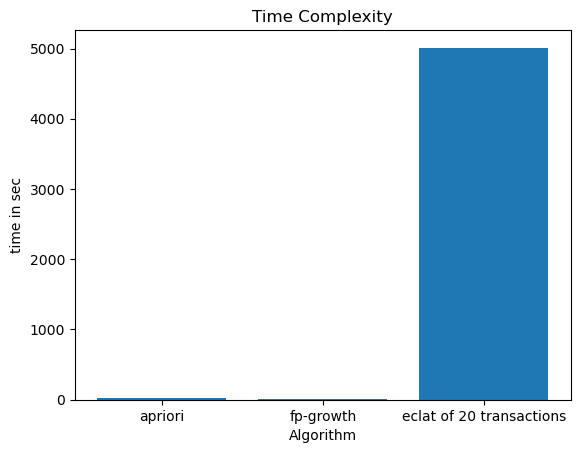

In [37]:
x = ["apriori", "fp-growth", "eclat of 20 transactions"]
y = [apriori_time, fp_growth_time, eclat_time]

plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("time in sec")
plt.title("Time Complexity")
plt.show()

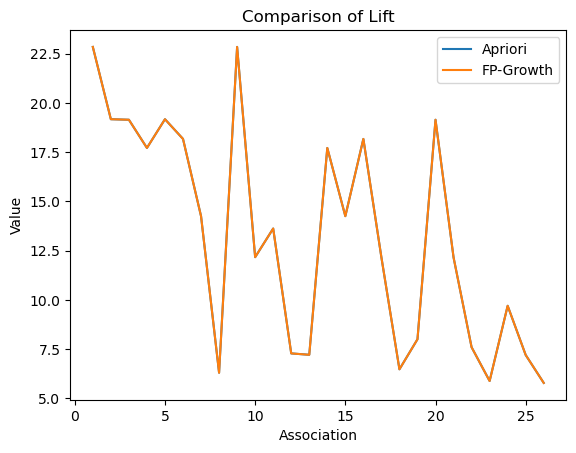

In [35]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(top_rules)+1)]  # x-axis values
y1 = top_rules["lift"] # y-axis values for DataFrame 1
y2 = fp_top_rules["lift"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('Association')
plt.ylabel('Value')
plt.title('Comparison of Lift')

# Add a legend
plt.legend()

# Display the graph
plt.show()

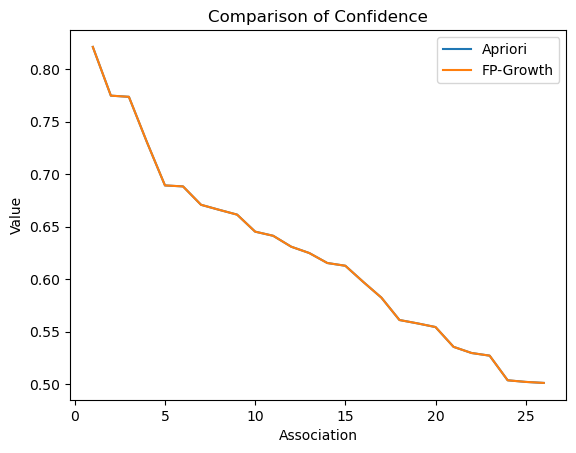

In [36]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(top_rules)+1)]  # x-axis values
y1 = top_rules["confidence"] # y-axis values for DataFrame 1
y2 = fp_top_rules["confidence"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('Association')
plt.ylabel('Value')
plt.title('Comparison of Confidence')

# Add a legend
plt.legend()

# Display the graph
plt.show()

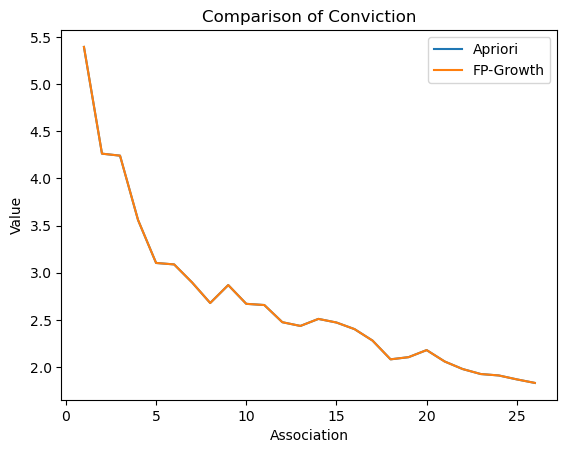

In [37]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(top_rules)+1)]  # x-axis values
y1 = top_rules["conviction"] # y-axis values for DataFrame 1
y2 = fp_top_rules["conviction"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('Association')
plt.ylabel('Value')
plt.title('Comparison of Conviction')

# Add a legend
plt.legend()

# Display the graph
plt.show()

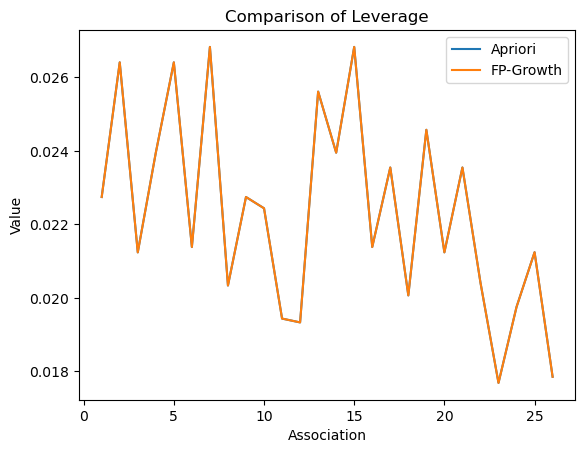

In [38]:
import matplotlib.pyplot as plt

# Sample data
x =  [i for i in range(1, len(top_rules)+1)]  # x-axis values
y1 = top_rules["leverage"] # y-axis values for DataFrame 1
y2 = fp_top_rules["leverage"]  # y-axis values for DataFrame 2


# Create a line graph
plt.plot(x, y1, label='Apriori')
plt.plot(x, y2, label='FP-Growth')

# Add labels and title
plt.xlabel('Association')
plt.ylabel('Value')
plt.title('Comparison of Leverage')

# Add a legend
plt.legend()

# Display the graph
plt.show()